Ejercicios: interpolacion de Lagrange

2. Sea
$$
\mathcal{L}_i(x)=\prod^n_{j=0,j\neq{i}}\frac{x-x_j}{x_i-x_j}
$$
Note que $\mathcal{L}_i(x)$ evaluado en $x=x_j$ para algun $j\in\{0,1,\dots,n\}$ es 0, pues 
$$
\mathcal{L}_i(x_j)=\prod^n_{j=0,j\neq{i}}\frac{x_j-x_j}{x_i-x_j}=\prod^n_{j=0,j\neq{i}}\frac{0}{x_i-x_j}=0
$$
De lo contrario, $\mathcal{L}_i(x)$ evaluado en $x=x_i$:
$$
\mathcal{L}_i(x_j)=\prod^n_{j=0,j\neq{i}}\frac{x_i-x_j}{x_i-x_j}=\prod^n_{j=0,j\neq{i}}1=1
$$
Entonces,
$$
\mathcal{L}_i(x_j)=\delta_{ij}
$$
Donde $\delta_{ij}$ es la delta de Kronecker definida como:
$$
\delta_{ij} :=
\begin{cases}
1 &si &i=j\\
0 &si &i\neq{j}\\
\end{cases}
$$
Ahora se veamos que $\mathcal{L}_i(x)$ es una base.
Por definicion de base, esta debe ser linealmente independiente tal que,
$$
c_0\mathcal{L}_0(x)+c_1\mathcal{L}_1(x)+\dots+c_n\mathcal{L}_n(x)=0
$$
Donde $c_0=c_1=\dots=c_n=0$
Sea $x_j$ tal que $j\in\{0,1,\dots,n\}$. Entonces se evalua la expresion en el punto $x=x_j$,
$$
c_0\mathcal{L}_0(x_j)+c_1\mathcal{L}_1(x_j)+\dots+c_n\mathcal{L}_n(x_j)=0
$$
Como $j\in\{0,1,\dots,n\}$, entonces todos los terminos tal que $i\neq{j}$ son 0 y existe un termino tal que $j=j$ y este es 1.
$$
c_0\mathcal{L}_0(x_j)+c_1\mathcal{L}_1(x_j)+\dots+c_j\mathcal{L}_j(x_j)+\dots+c_n\mathcal{L}_n(x_j)=c_0\cdot0+c_1\cdot0+\dots+c_j\cdot1+\dots+c_n\cdot0=0
$$
Entonces se tiene que $c_j=0$ y se cumple la condicion para que $\mathcal{L}_i(x)$ sea linealmente independiente, y por ende, una base.

3.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [56]:
def Lagrange(x, X, i):
    L = 1
    for j in range(len(X)):
        if i != j:
            L *= (x-X[j])/(X[i]-X[j])
    return L

In [57]:
def interpolate(x, X, Y):
     
    poly = 0
    for i in range(len(X)):
        poly += Y[i]*Lagrange(x, X, i)
    return poly

In [58]:
#SOPORTE
X = np.array([100, 121, 144])
Y = np.array([10, 11, 12])

x = sym.Symbol('x', real = True)

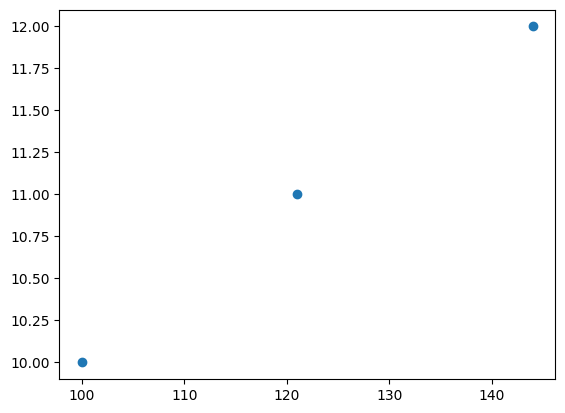

In [59]:
plt.scatter(X, Y)

In [60]:
y=interpolate(x, X, Y)

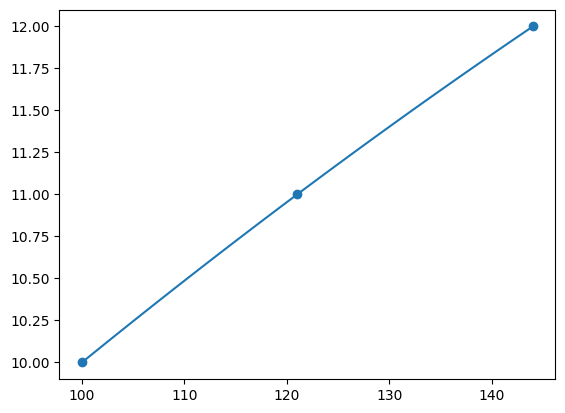

In [61]:
plt.scatter(X, Y)
plt.plot(np.linspace(100, 144, 100), [y.subs(x, i) for i in np.linspace(100, 144, 100)])
plt.show()

In [63]:
#Calcular sqrt(114):
print(y.subs(x, 114).n())
#exacto
print(np.sqrt(114))

10.6758893280632
10.677078252031311


In [65]:
#Calculo del error

0.00118892396807091

Calcular el error
$$
E = \frac{f^{(n+1)}(\xi_x)}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n)=\frac{f^{(3)}(100)}{3!}(114-100)(114-121)\dots(114-144)
$$
donde $f(x)=\sqrt{x}$

In [75]:
print(sym.diff(sym.sqrt(x), x, 3).subs(x,100)*(114-100)*(114-121)*(114-144)/sym.factorial(3).n())

0.00183750000000000


4.

In [98]:
#SOPORTE
X = np.array([1.4, 3.5, 5.6])
Y = np.array([0.4007954931819738, 0.594128102489774, 0.29802795523938164])


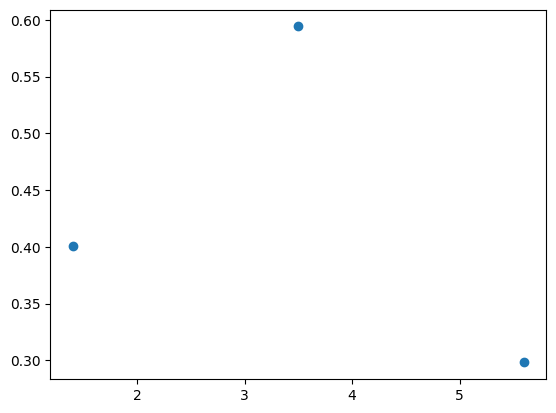

In [99]:
plt.scatter(X, Y)

In [102]:
y = sym.simplify(interpolate(x, X, Y))
print(y)

x*(0.363970234266202 - 0.0554912422401579*x)


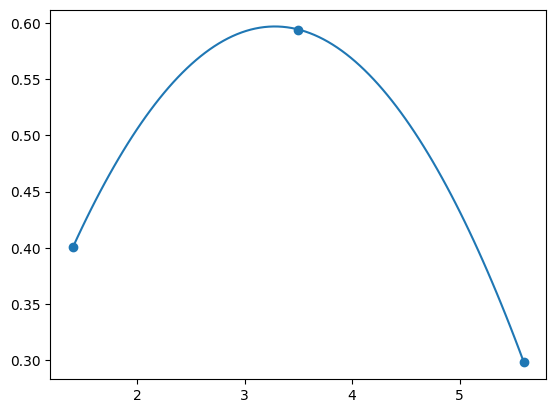

In [101]:
plt.scatter(X, Y)
plt.plot(np.linspace(1.4, 5.6, 100), [y.subs(x, i) for i in np.linspace(1.4, 5.6, 100)])
plt.show()

In [91]:
y.subs(x, 1.4)

0.400795493181973

El tiro parabolico de un proyectil esta dado por las ecuaciones:
$$
\begin{cases}
x=v_xt\\
y=v_yt-\frac{1}{2}gt^2\\
\end{cases}
$$
Se despeja $t$ en ecuacion 1 para reescribir y en terminos de x:
$$
y(x)=\frac{v_y}{v_x}x-\frac{g}{2v^2_x}x^2
$$
Donde $g=9.8m/s^2$.

Note que $y=x*(0.363970234266202 - 0.0554912422401579*x)$ tiene un termino lineal y otro cuadratico, asi que se puede igualar a los terminos de $y(x)$

$0.363970234266202=\frac{v_y}{v_x}$ y $0.0554912422401579=\frac{g}{2v^2_x}$

Luego se despeja $v_x=9.396m/s$ y $v_y=3.420m/s$

Calculamos $v=\sqrt{v^2_x+v^2_x}=10m/s$ y $\theta=\tan^{-1}(\frac{v_y}{v_x})=20^{\circ}$